<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-48/blob/main/Actividad_Semanal_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Equipo 48
* Materia: Ciencia y Analítica de Datos.
* Nombre de la entrega: Semana 3 Actividad 1.
* Fecha: 10/10/2022.
* Francisco Medellin Zertuche - A01794044.
* Roberto Romero Vielma - A00822314
* Profesor titular: Jobish Vallikavungal Devassia. 
* Profesor tutor: Roberto Antonio Guevara González.


Importamos la librería pandas

In [1]:
import pandas as pd

Cargamos la base de datos con la función **pandas.read_csv**

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv")

Creamos un nuevo dataframe que sea copia del original, para eliminar los registros que se encuentran vacíos y verificar que esto no nos afecte para futuros análisis

In [3]:
ndf=df.copy()
ndf.dropna(inplace = True)
ndf2= ndf.copy()

Primero modificamos la columna X3 para quedarnos solamente con valores dentro de la categoría 4 (otros estudios)

In [4]:
ndf2["X3"] = ndf2[["X3"]].replace([0,5,6],4)

Hacemos lo mismo con la columna X4 para reemplazar los valores 0 con 3 (Otros)

In [5]:
ndf2["X4"]=ndf2[["X4"]].replace(0,3)

Con las columnas X6 a X11 sustituimos el valor de -2 por -1 (Pago oportuno)

In [6]:
slc = ndf2.loc[ : , "X6":"X11"]
for c in slc.columns:
  ndf2[c] = ndf2[[c]].replace(-2,-1)

Tal como se puede observar las columnas X6 a la X11 presentan otro valor que no se menciona en la documentación, el valor **0**, procedemos a reemplazarlo con **-1** dado que es muy probable que sea un error de captura

In [7]:
slc = ndf2.loc[ : , "X6":"X11"]
for c in slc.columns:
  ndf2[c] = ndf2[[c]].replace(0,-1)

In [8]:
df = ndf2.copy()

# Parte 1: Ejercicio guiado 


## Paso 1: 
Determina el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

In [9]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn import preprocessing

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Analisis rapido del DF
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,-1.0,-1.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,-1.0,-1.0,-1.0,-1.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,-1.0,-1.0,-1.0,-1.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,-1.0,-1.0,-1.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


Verificamos que solo tenemos variables cuantitativas numericas.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      29958 non-null  int64  
 1   X1      29958 non-null  int64  
 2   X2      29958 non-null  float64
 3   X3      29958 non-null  float64
 4   X4      29958 non-null  float64
 5   X5      29958 non-null  float64
 6   X6      29958 non-null  float64
 7   X7      29958 non-null  float64
 8   X8      29958 non-null  float64
 9   X9      29958 non-null  float64
 10  X10     29958 non-null  float64
 11  X11     29958 non-null  float64
 12  X12     29958 non-null  float64
 13  X13     29958 non-null  float64
 14  X14     29958 non-null  float64
 15  X15     29958 non-null  float64
 16  X16     29958 non-null  float64
 17  X17     29958 non-null  float64
 18  X18     29958 non-null  float64
 19  X19     29958 non-null  float64
 20  X20     29958 non-null  float64
 21  X21     29958 non-null  float64
 22

El método preprocessing nos sirve para estandarizar el data frame.<br>
La estandarización de los datos es un paso requerido para el metodo PCA.<br>
Al estandarizar, la media de todos los datos será 0 con un rango de -1 a 1. <br>

In [14]:
# Recordatorio: asegurarse de limpiar el df, aqui el df ya ha sido limpiado.
pcs = PCA()
pcs.fit(preprocessing.scale(df)) 

PCA()

La estandarización nos sirve para evitar grandes varianzas entre los componente principales, además de que elimina la mayoría de los outliers dentro del dataset

Analizamos la desviacion estandar, la varianza y la proporcion acumulativa de varianza de los  PCA's.

Medidas de dispersion o variabilidad:

In [13]:
pcsSummary_df = pd.DataFrame({'Desviación estándar': np.sqrt(pcs.explained_variance_),
                             'Proporción de la varianza': pcs.explained_variance_ratio_,
                             'Proporción acumulativa': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
Desviación estándar,2.4356,2.0112,1.2854,1.2330,1.0328,1.0126,1.0033,0.9913,0.9470,0.9402,...,0.7309,0.7078,0.5972,0.5130,0.4970,0.4530,0.2657,0.2025,0.1588,0.1524
Proporción de la varianza,0.2373,0.1618,0.0661,0.0608,0.0427,0.0410,0.0403,0.0393,0.0359,0.0354,...,0.0214,0.0200,0.0143,0.0105,0.0099,0.0082,0.0028,0.0016,0.0010,0.0009
Proporción acumulativa,0.2373,0.3991,0.4652,0.5260,0.5686,0.6097,0.6499,0.6892,0.7251,0.7605,...,0.9307,0.9507,0.9650,0.9755,0.9854,0.9936,0.9964,0.9981,0.9991,1.0000


Observamos que despues del PCA 10 tenemos casi el 80%.

<H3>Scree Plot</H3>

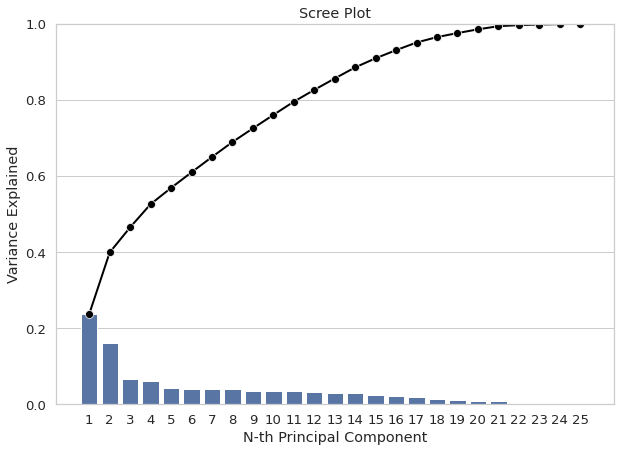

In [15]:
PC_components = np.arange(pcs.n_components_) + 1 # sumamos +1 por que el arrange te da menos -1 el rango
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

Observamos que el primer componente es el que tiene mayor cantidad de varianza.

Analizemos que tenemos despues del PCA 10.

In [19]:
summary_df = pcsSummary_df.round(4)
summary_df.iloc[: , 10:]

,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
Desviación estándar,0.9323,0.8814,0.8646,0.8547,0.7729,0.7309,0.7078,0.5972,0.5130,0.4970,0.4530,0.2657,0.2025,0.1588,0.1524
Proporción de la varianza,0.0348,0.0311,0.0299,0.0292,0.0239,0.0214,0.0200,0.0143,0.0105,0.0099,0.0082,0.0028,0.0016,0.0010,0.0009
Proporción acumulativa,0.7952,0.8263,0.8562,0.8854,0.9093,0.9307,0.9507,0.9650,0.9755,0.9854,0.9936,0.9964,0.9981,0.9991,1.0000


Tomaremos los primeros 13 componentes principales ya que contienen hasta un 85% de la proporcion de la varianza.

In [24]:
summary_df = pcsSummary_df.round(4)
summary_df.iloc[: , :13]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Desviación estándar,2.4356,2.0112,1.2854,1.2330,1.0328,1.0126,1.0033,0.9913,0.9470,0.9402,0.9323,0.8814,0.8646
Proporción de la varianza,0.2373,0.1618,0.0661,0.0608,0.0427,0.0410,0.0403,0.0393,0.0359,0.0354,0.0348,0.0311,0.0299
Proporción acumulativa,0.2373,0.3991,0.4652,0.5260,0.5686,0.6097,0.6499,0.6892,0.7251,0.7605,0.7952,0.8263,0.8562


In [22]:
pcsSummary_df.iloc[2,12] # Proporcion acumulativa en PC13

0.8561917532419346

**Con esto encontramos que necesitamos los primeros 13 componentes principales que tienen mas del 85% de la varianza total.**

## PASO 2
Interprete cada componente principal en términos de las variables originales

In [26]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=df.columns
                                )
pcsComponents_df= pcsComponents_df.iloc[:,:13]
pcsComponents_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
ID,0.013805,-0.011758,0.001212,0.081963,0.413036,-0.281727,0.307916,-0.786714,-0.067681,-0.046574,0.017445,-0.111016,0.054324
X1,0.171895,-0.145240,0.245485,0.097717,-0.389958,-0.308793,0.082207,-0.092545,0.054086,-0.031545,0.024253,-0.003146,-0.086681
X2,-0.010057,-0.034112,-0.002277,-0.060968,0.344271,-0.647725,0.344547,0.535787,0.083730,-0.002706,0.018274,0.037936,0.021362
X3,-0.013567,0.053370,-0.189582,0.358169,0.580886,0.298376,-0.065284,0.195348,-0.290744,0.000100,-0.158860,0.073843,-0.001497
X4,-0.019802,-0.003353,0.003395,-0.636247,0.117397,0.207078,-0.022895,-0.085985,-0.118716,-0.009699,-0.052760,0.037592,-0.020278
X5,0.034414,-0.006598,0.003168,0.661220,-0.157559,0.005014,-0.089926,-0.037395,0.034607,0.003705,0.036724,0.013269,-0.036671
X6,-0.029081,0.356875,0.035786,0.027202,-0.097066,0.165862,0.407935,0.052263,0.073874,-0.012313,0.014538,-0.023669,-0.224828
X7,-0.019452,0.390181,0.046982,0.016473,-0.055356,0.121928,0.309356,0.023314,-0.002616,-0.011168,-0.015658,-0.032725,-0.370575
X8,-0.025297,0.395581,0.089881,-0.003141,-0.004758,-0.011805,0.036282,-0.003695,-0.036741,-0.019612,-0.024936,-0.038619,-0.299020
X9,-0.024987,0.401736,0.111907,-0.002334,0.042317,-0.158263,-0.202169,-0.059679,-0.068913,-0.026981,0.010751,-0.049079,-0.010773


Examinamos la magnitud y direccion de los coeficientes de las variables originales y buscamos la variable mas importante con mayor peso por cada componente.

In [66]:
c = (pcsComponents_df.PC1.nlargest(1))
dict(c)

{'X15': 0.3892533777292556}

In [95]:
def _max_weigth(pc_name, list_min_max):
  ab=[]
  ab.extend(list_min_max[0].values())
  ab.extend(list_min_max[1].values())
  _max = max(ab)
  for dic in list_min_max:
    for key, val in dic.items():
      if abs(val) == _max:
        return [pc_name, key, val ]
  

for c in pcsComponents_df.columns:
  print(_max_weigth( c, [ dict(pcsComponents_df[c].nlargest(1)) , dict(pcsComponents_df[c].nsmallest(1)) ])) 

['PC1', 'X15', 0.3892533777292556]
['PC2', 'X9', 0.40173641349202355]
['PC3', 'X19', 0.4024956486546903]
['PC4', 'X5', 0.6612196730985622]
['PC5', 'X3', 0.5808855011197103]
['PC6', 'X3', 0.29837646826485875]
['PC7', 'Y', 0.41951761053548875]
['PC8', 'X2', 0.5357872827321599]
['PC9', 'X18', 0.2743454998072303]
['PC10', 'X21', 0.6153706453646063]
['PC11', 'X19', 0.4383003126296271]
['PC12', 'X20', 0.7835417355577609]
['PC13', 'Y', 0.7435258353286127]


## Paso 3
Identifique valores atípicos